<a href="https://colab.research.google.com/github/PrazaKembaren/Visualisasi-Gempa/blob/main/Visualisasi_Gempa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualisasi Gempa Bumi di Indonesia

Gempa Bumi merupakan salah satu bencana alam yang sering terjadi di Indonesia. Secara geografis, wilayah Indonesia dilalui jalur cincin api (*ring of fire*) dan terletak di pertemuan beberapa lempeng utama dunia, seperti lempeng Eurasia, Indo-Australia dan Pasifik. Berikut Visualisasi frekuensi kejadian gempa bumi dengan magnitudo > 6.0 di Indonesia dalam rentang waktu tahun 1900 hingga 2024.

\
Sumber Data: [USGS Earthquake Catalog](https://earthquake.usgs.gov/earthquakes/search/)

In [ ]:
#Mengunduh modul cartopy

!pip install cartopy


In [ ]:
#impor modul
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.feature as cf
import matplotlib
import numpy as np
import cartopy.crs as ccrs

from matplotlib.animation import FuncAnimation
from itertools import count

import cartopy.io.shapereader as shpreader
import matplotlib.patheffects as PathEffects

In [ ]:
#Impor data
df = pd.read_csv("/content/DataGempaIndonesia.csv")

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] == (20,18)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['figure.dpi'] = 600

In [ ]:
x = list(df['longitude']) #bujur
y = list(df['latitude'])  #lintang
mag = list(df['mag']) #magnitudo
d = list(df['depth']) #kedalaman

In [ ]:
#klasifikasi kedalaman
def c_d(depth):
  if depth < 60:
    return 'r'
  elif 60. <= depth <= 300.:
    return 'y'
  else:
    return 'b'

In [10]:
plt.figure(figsize=(20,18))
ax = plt.axes(projection=ccrs.PlateCarree())  #proyeksi peta

#batas bujur-lintang peta
ax.set_xlim(88,145)
ax.set_ylim(-15,10)

#menambahkan perbatasan
ax.add_feature(cf.BORDERS)

#resolusi peta
ax.coastlines(resolution = '10m')

#Posisi Jakarta
ax.text(106.91, -6.2088, 'Jakarta', transform=ccrs.Geodetic())

#Gridline
ax.gridlines(draw_labels=True, dms=True, linestyle=':', color='k',x_inline=False, y_inline=False, alpha=0.9)
plt.grid()

#Batas Provinsi
fn = shpreader.natural_earth(
    resolution='10m', category='cultural',
    name='admin_1_states_provinces',
)
reader = shpreader.Reader(fn)
states = [x for x in reader.records() if x.attributes["admin"] == "Indonesia"]
states_geom = cf.ShapelyFeature([x.geometry for x in states], ccrs.PlateCarree())
ax.add_feature(states_geom, facecolor="none", edgecolor="k")

#fitur daratan dan lautan
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)

#teks nama provinsi
for state in states:

    lon = state.geometry.centroid.x
    lat = state.geometry.centroid.y
    name = state.attributes["name"]

    ax.text(
        lon, lat, name, size=7, transform=ccrs.PlateCarree(), ha="center", va="center",
        path_effects=[PathEffects.withStroke(linewidth=5, foreground="w")]
    )

for i in range(len(mag)):
  color = c_d(d[i])
  plt.scatter(x[i], y[i], edgecolors='orange', s = np.exp(mag[i]), alpha=0.7, c=color)
plt.title("Distribusi Gempa Magnitudo > 6 di Indonesia (1900-2024)", pad=20, fontsize=25)

#label
ax.set_xlabel("Bujur", labelpad=20)
ax.set_ylabel("Lintang", labelpad=20)

# legenda untuk magnitudo
legend_elements = []
for i in range(6, 10):
    legend_elements.append(
        plt.scatter([], [], s=np.exp(i), c='k', edgecolors='orange', alpha=0.7, label=f'Magnitudo {i}'))

# magnitudo
leg1 = ax.legend(handles=legend_elements, title="Magnitudo", bbox_to_anchor=(1.02, 0, 0.2, 1), labelspacing = 4, title_fontsize=16, handletextpad=3.3, fontsize=12, frameon=False)
ax.add_artist(leg1)

#legenda kedalaman
legend_elements_depth = []
depths = ['Dangkal (<60 km)', 'Menengah (60-300 km)', 'Dalam (>300 km)']
colors = ['r', 'y', 'b']

for i, depth in enumerate(depths):
    legend_elements_depth.append(
        plt.scatter([], [], s=100, c=colors[i], label=depth))

ax.legend(handles=legend_elements_depth, title="Kedalaman",  bbox_to_anchor=(1.06, 0, 0.2, 1), loc="lower right", labelspacing = 3, title_fontsize=16, handletextpad=3, fontsize=12, frameon=False)

#simpan
plt.savefig("petagempa.png")


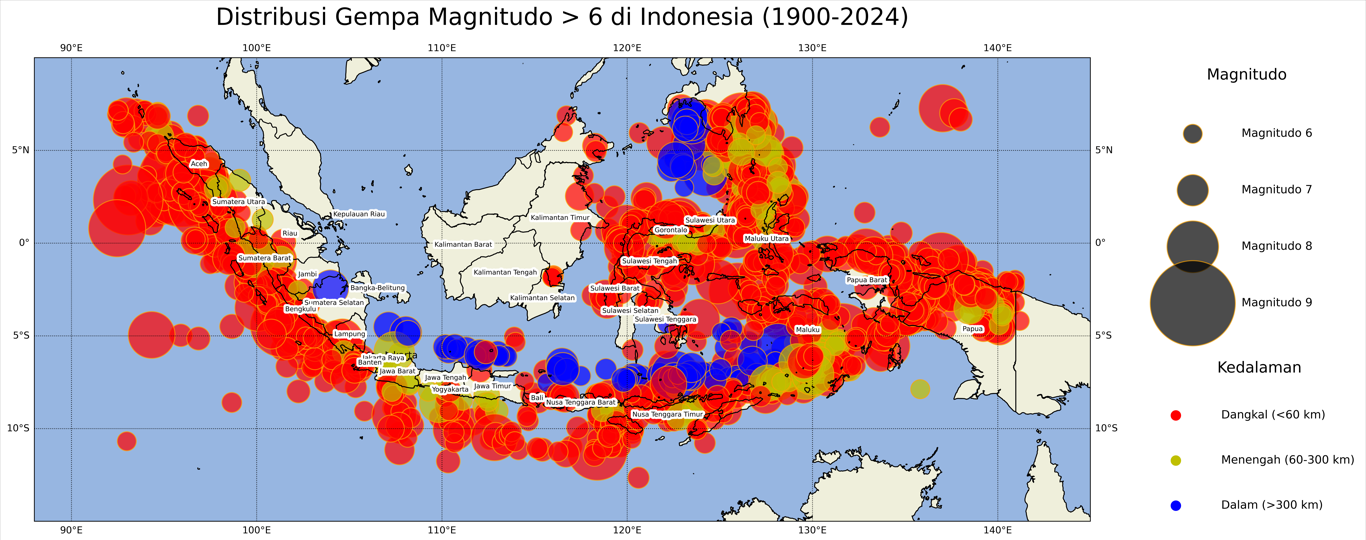

### Kejadian Gempa (Kumulatif)

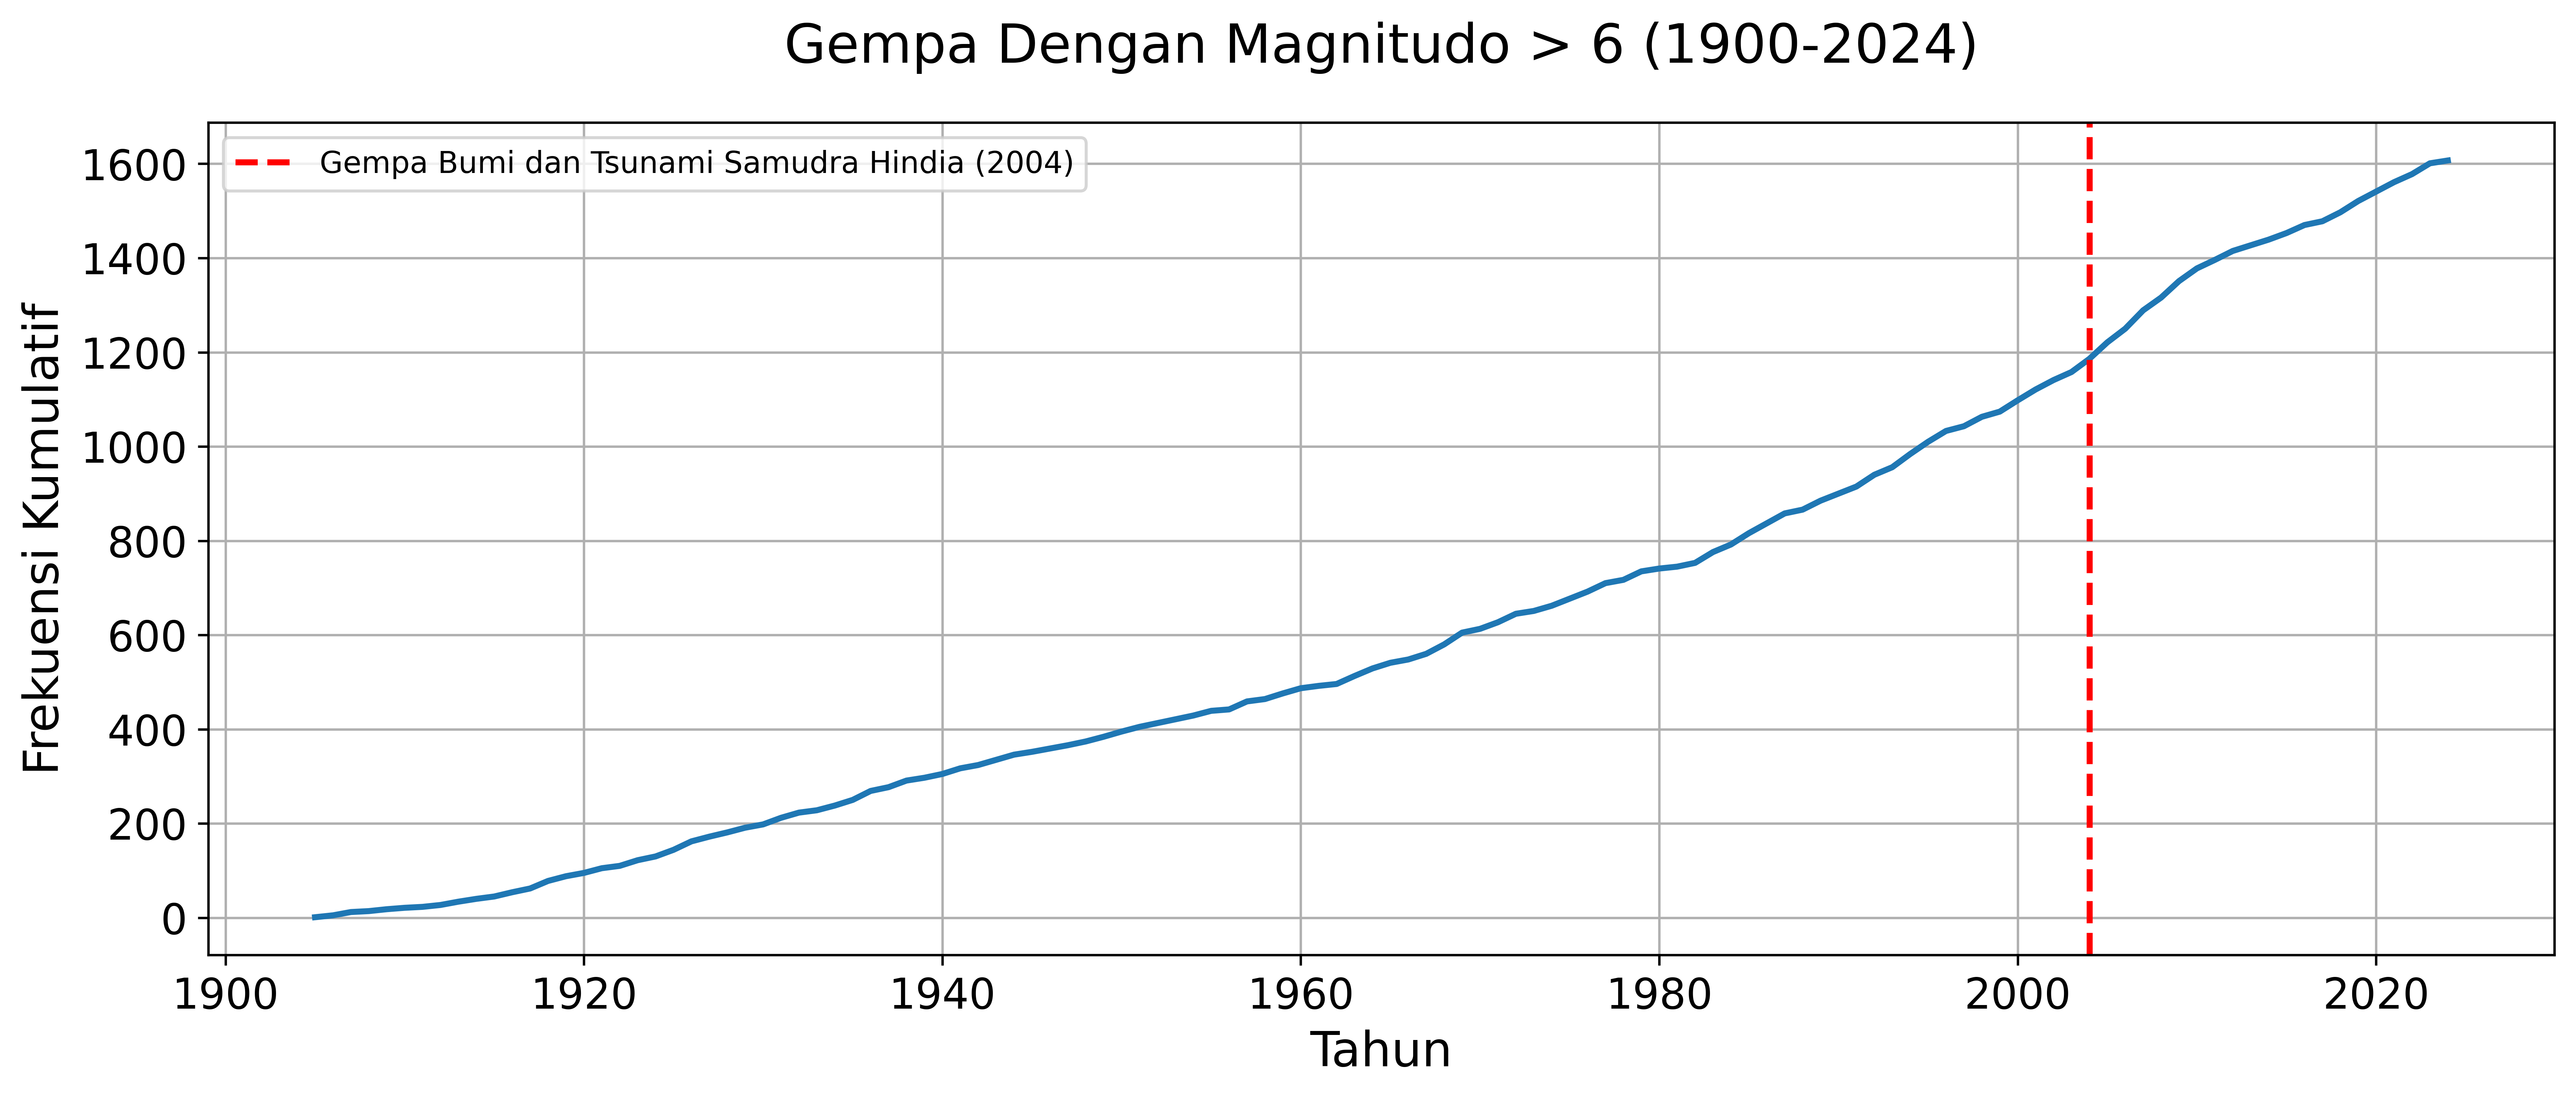

In [ ]:
df['tahun'] = pd.to_datetime(df['time']).dt.year
df_tahun = df.groupby('tahun').size().reset_index(name='jumlah')
df_tahun = df_tahun.sort_values('tahun', ascending=True)

#plotting
plt.figure(figsize=(14, 5))
plt.plot(df_tahun['tahun'], df_tahun['jumlah'].cumsum(), linewidth=2)

#judul dan label
plt.xlabel('Tahun', fontsize=16)
plt.ylabel('Frekuensi Kumulatif', fontsize=16)
plt.title('Gempa Dengan Magnitudo > 6 (1900-2024)', fontsize=18, pad=20)

#grid
plt.grid(True)

#gempa besar Samudra Hindia 2004
gempa_besar = df[df['mag'] > 9]['tahun'].unique()

#penanda garis vertikal
for tahun in gempa_besar:
    plt.axvline(x=tahun, color='r', linestyle='--', linewidth=2, label="Gempa Bumi dan Tsunami Samudra Hindia (2004)")

plt.legend()

plt.show()